<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<br><b>DP0.3 Overview</b> <br>
Contact author(s): Jake Kurlander<br>
Last verified to run: 2024-06-01 <br>
Container size: medium <br>
Targeted learning level: beginner <br>

**Description:** Learn about the DP0.3 tables, practice querying Solar System object data, and querying an external service.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

from lsst.rsp import get_tap_service

# Introduction to the DP0.3 Tables

We use 'ssotap', short for Solar System Object TAP, to query DP0.3. Let's use it to learn about the different DP0.3 tables! 

In [6]:
service = get_tap_service("ssotap")

tables = service.search("SELECT table_name FROM tap_schema.tables").to_table().to_pandas()
table_names = tables['table_name'].values
list(table_names)

['dp03_catalogs_10yr.DiaSource',
 'dp03_catalogs_10yr.MPCORB',
 'dp03_catalogs_10yr.SSObject',
 'dp03_catalogs_10yr.SSSource',
 'dp03_catalogs_1yr.DiaSource',
 'dp03_catalogs_1yr.MPCORB',
 'dp03_catalogs_1yr.SSObject',
 'dp03_catalogs_1yr.SSSource',
 'tap_schema.columns',
 'tap_schema.key_columns',
 'tap_schema.keys',
 'tap_schema.schemas',
 'tap_schema.tables',
 'uws.Job']

There is a 10-year and 1-year version of each of the four DP0.3 tables: DiaSource, MPCORB, SSObject, and SSSource. We will use the 1-year versions in this notebook to keep querying times low -- the ten-year catalogs include about a half billion detections!

<table ><tr><th><th> <td><h2> Per-Object </h2></td> <th> <td><h2> Per-detection </h2></td><tr><tr>
<tr><th><h2>Rubin Solar System </h2><td><td> <h1>SSObject </h1> <td><td> <h1> SSSource </h1><td><tr>
<tr><th><h2> Inherited </h2><td><td> <h1>MPCORB</h1><td><td> <h1>DiaSource</h1> <td><tr><table>

Now let's look at the contents of each table...

In [7]:
table_names = [ 'SSObject', 'SSSource', 'MPCORB', 'DiaSource']

for table_name in table_names:
    search_result = service.search(f"SELECT * FROM dp03_catalogs_1yr.{table_name} LIMIT 1")
    table_columns = list(search_result.to_table().columns)
    print(table_name, ':', table_columns, '\n\n')

SSObject : ['arc', 'discoverySubmissionDate', 'firstObservationDate', 'flags', 'g_Chi2', 'g_G12', 'g_G12Err', 'g_H', 'g_H_gG12_Cov', 'g_HErr', 'g_Ndata', 'i_Chi2', 'i_G12', 'i_G12Err', 'i_H', 'i_H_iG12_Cov', 'i_HErr', 'i_Ndata', 'maxExtendedness', 'medianExtendedness', 'minExtendedness', 'MOID', 'MOIDDeltaV', 'MOIDEclipticLongitude', 'MOIDTrueAnomaly', 'numObs', 'r_Chi2', 'r_G12', 'r_G12Err', 'r_H', 'r_H_rG12_Cov', 'r_HErr', 'r_Ndata', 'ssObjectId', 'u_Chi2', 'u_G12', 'u_G12Err', 'u_H', 'u_H_uG12_Cov', 'u_HErr', 'u_Ndata', 'y_Chi2', 'y_G12', 'y_G12Err', 'y_H', 'y_H_yG12_Cov', 'y_HErr', 'y_Ndata', 'z_Chi2', 'z_G12', 'z_G12Err', 'z_H', 'z_H_zG12_Cov', 'z_HErr', 'z_Ndata'] 


SSSource : ['diaSourceId', 'eclipticBeta', 'eclipticLambda', 'galacticB', 'galacticL', 'heliocentricDist', 'heliocentricVX', 'heliocentricVY', 'heliocentricVZ', 'heliocentricX', 'heliocentricY', 'heliocentricZ', 'mpcUniqueId', 'phaseAngle', 'predictedDecErr', 'predictedMagnitude', 'predictedMagnitudeErr', 'predictedR

Descriptions of each column can be found in the DP0.3 schema browser: https://dm.lsst.org/sdm_schemas/browser/dp03.html.  Note that these do not perfectly represent the columns in Rubin data release tables. For example, while this DP0.3 includes 'truth' information (for example, DiaSource's 'decTrue' column which has the same values as 'dec' but without astrometric scatter), Rubin data will not have associated truth values. Also, the solar system schema is still being finalized (or at least was being finalized well after DP0.3's release). 

More DP0.3 documentation, including a list of known issues, can be found at https://dp0-3.lsst.io/index.html

# An example query for each table

## MPCORB

In [8]:
closest_objects = service.search("SELECT mpcDesignation,q,e,incl FROM dp03_catalogs_1yr.mpcorb order by q LIMIT 5").to_table().to_pandas()
farthest_objects = service.search("SELECT mpcDesignation,q,e,incl FROM dp03_catalogs_1yr.mpcorb order by q DESC LIMIT 5").to_table().to_pandas()



In [9]:
closest_objects

,mpcDesignation,q,e,incl
0,S0000nZP,0.000404,0.999001,23.987303
1,S00019mv,0.000490,0.998988,40.377006
2,S00009Q7,0.000523,0.999009,31.425573
3,S0000ZJ8,0.000582,0.998999,29.242445
4,S0000DPj,0.000598,0.999183,47.469099


In [10]:
farthest_objects

,mpcDesignation,q,e,incl
0,2012 VP1,80.493010,0.703055,24.03837
1,2003 VB1,76.371023,0.854294,11.93034
2,2019 EE6,74.769293,0.555029,163.02896
3,2020 MJ5,74.243694,0.098788,7.25508
4,2022 LT1,68.043242,0.099324,4.96134


We see that the lowest-perihelion objects all have designations beginning with 'S0' -- these objects are synthetic NEOs from the Pan-STARRS synthetic solar system model (S3M). These closest objects have pericenter smaller than a solar radius, so if they were real, they would collide with the Sun within an orbit, which shows us that our NEO model (S3M) extends too close to the Sun. 

The highest-pericenter objects each have a Minor Planet Center style designation -- these are real, known objects. It's likely that Rubin will discover more-distant and higher-pericenter objects than are currently known, so this shows us that our TNO model (also S3M) doesn't extend far enough out. 

The 14 million objects simulatd for DP0.3, only a few million of which are actually detected by Rubin, come from several synthetic populations. In addition to all known real solar system objects (as of summer 2023) and S3M, we also include a Centaur model (names begin with 'CEN'), a long-period comet population (names beginning with 'LPC'), and an interstellar object model (names beginning with 'ISO'). The long-period comet and interstellar object models are 'unnormalized', so the number of discovered objects in DP0.3 is not meaningful. The other populations are normalized, though issues with color choices mean that discovery predictions are inaccurate to a factor of 2. 

## SSSource

In [11]:
highest_phases = service.search("SELECT phaseAngle FROM dp03_catalogs_1yr.ssSource order by phaseAngle DESC LIMIT 5").to_table().to_pandas()
highest_phases


,phaseAngle
0,123.223381
1,123.213196
2,122.633751
3,122.619392
4,122.590652


## SSObject

In [12]:
most_r_detections = service.search("select r_Ndata,r_H from dp03_catalogs_1yr.ssObject ORDER BY r_Ndata DESC LIMIT 5").to_table().to_pandas()
most_r_detections

,r_Ndata,r_H
0,146,14.948089
1,142,17.412113
2,134,15.372456
3,132,10.276620
4,131,14.052773


## DiaSource

Sometimes we don't need the full table, and can get the information we want with just a small uniform sample of rows. For example, if we wanted to quickly learn about the distribution of detections by band and magnitude, we could make do with just a small fraction of the total table. We can take advantage of the fact that SSObjectID and DiaSourceID are randomly generated values between -2^63 and 2^63 in order to take uniformly-sampled slices of any table of any size...

In [13]:
fraction_of_table = 0.0025
almost_2_63 = int(2 ** 63 * (1-fraction_of_table * 2))

results = service.search("SELECT band,mag FROM dp03_catalogs_1yr.DiaSource "+
                        f"WHERE diaSourceId > {almost_2_63}")

results = results.to_table().to_pandas()
print(len(results))


120906


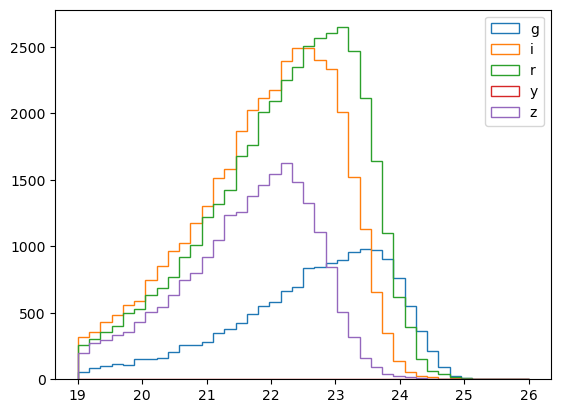

In [14]:
for g in results.groupby('band'):
    plt.hist(g[1]['mag'], label=g[1]['band'].values[0], range=[19, 26], histtype='step', bins=40)
    
plt.legend()
plt.show()

# Tying all tables together: ssObjectID

All four solar system tables share an index, ssObjectID, which is used to connect the tables together. Since relevant data is split across the four tables, we will often want to join tables together and work on combined data. Given objects' MPC designations, we can get their SSObjectIDs from MPCORB. Let's investigate three famous objects: Bennu (1999 RQ36), Holman (1979 HP), and Eris (2003 UB313).

In [15]:
mpcorb_results = service.search("SELECT * FROM dp03_catalogs_10yr.mpcorb WHERE mpcDesignation in ('1999 RQ36', '1979 HP', '2003 UB313')")

mpcorb_results = mpcorb_results.to_table().to_pandas()
print(len(mpcorb_results))


3


In [16]:
ssObjectId_strings = str(tuple(mpcorb_results['ssObjectId'].values.astype(str)))
ssObjectId_strings


"('2711058357623702957', '4461427635112752985', '-3574538124279186555')"

In [17]:
results = service.search("SELECT * FROM dp03_catalogs_10yr.diaSource WHERE ssObjectID in " + ssObjectId_strings).to_table().to_pandas()


In [18]:
results_groups = results.groupby("nameTrue")
for object_name, object_data in results_groups:
    print(object_name)

1979 HP
1999 RQ36
2003 UB313


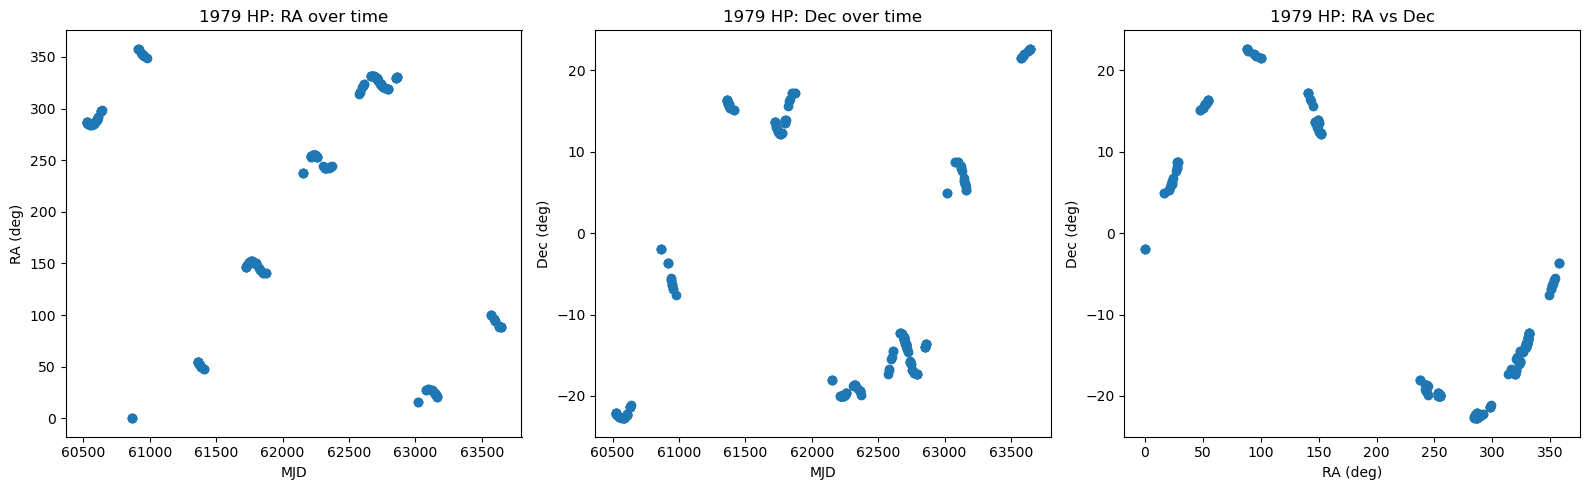

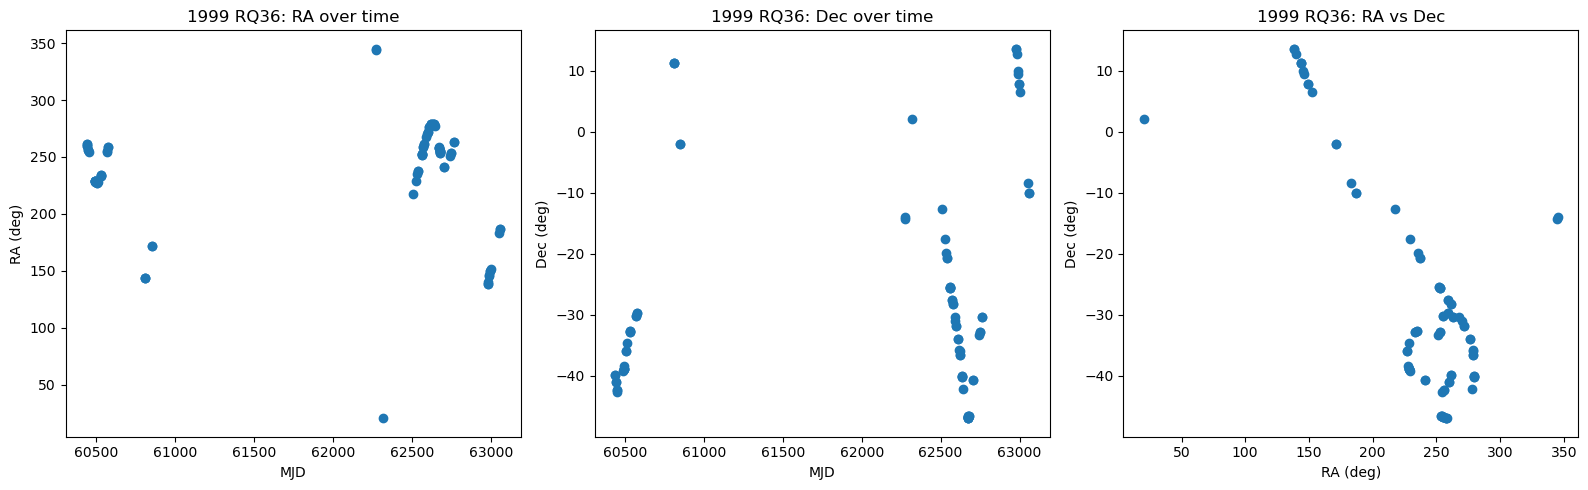

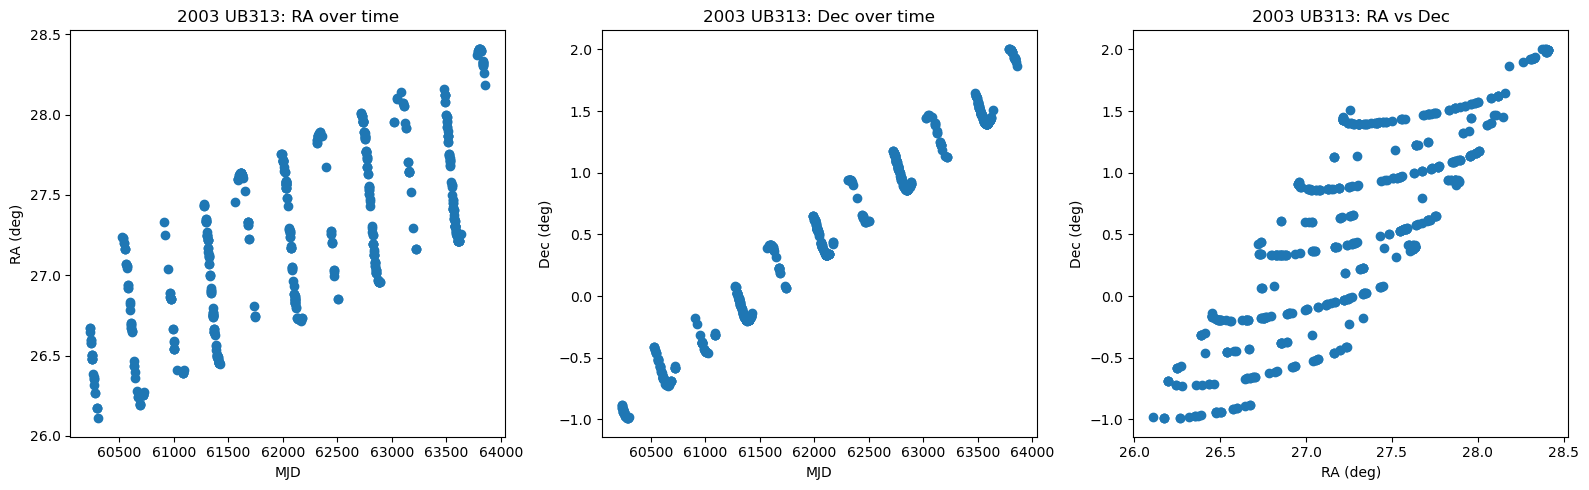

In [19]:
for ObjID, dp03_detections in results_groups:

    fig, axes = plt.subplots(1, 3, figsize=(16, 5))  # Create a figure with 3 subplots in a single row

    axes[0].scatter(dp03_detections['midPointMjdTai'], dp03_detections['ra'])
    axes[0].set_title(f"{ObjID}: RA over time")
    axes[0].set_xlabel('MJD')
    axes[0].set_ylabel('RA (deg)')
    
    # Second subplot
    axes[1].scatter(dp03_detections['midPointMjdTai'], dp03_detections['dec'])
    axes[1].set_title(f"{ObjID}: Dec over time")
    axes[1].set_xlabel('MJD')
    axes[1].set_ylabel('Dec (deg)')
    
    # Third subplot
    axes[2].scatter(dp03_detections['ra'], dp03_detections['dec'])
    axes[2].set_title(f"{ObjID}: RA vs Dec")
    axes[2].set_xlabel('RA (deg)')
    axes[2].set_ylabel('Dec (deg)')
    
    plt.tight_layout()  # Adjust subplots to fit into the figure area.
    plt.show()
    print('\n\n\n')

In [20]:
mpcorb_results[['mpcDesignation', 'q']]

,mpcDesignation,q
0,1979 HP,2.714734
1,1999 RQ3,0.894706
2,2003 UB3,38.638130


# Plot Comparisons

In [21]:
from lsst.rsp import get_tap_service
from astroquery.jplhorizons import Horizons

#Plot ra and decs of DP0.3 detections, as well as Horizons 
def scatter_and_plot_skypath(dp03_ra, dp03_dec, horizons_same_time_ra, horizons_same_time_dec, 
                             horizons_uniform_time_ra, horizons_uniform_time_dec, ObjID): 
    plt.scatter(dp03_ra, dp03_dec, label='DP0.3 positions')
    plt.plot(horizons_uniform_time_ra, horizons_uniform_time_dec, label='Horizons path')
    plt.title(ObjID + ' skypath')
    plt.scatter(horizons_same_time_ra, horizons_same_time_dec, s=7, color='yellow', label='Horizons positions')
    plt.xlabel('RA (deg)')
    plt.ylabel('Dec (deg)')
    plt.legend()
    plt.show()


def scatter_differences(dp03_ra, dp03_dec, horizons_same_time_ra, horizons_same_time_dec, mjds, ObjID):
    plt.title(ObjID + ' DP0.3-Horizons Disagreement')
    plt.scatter((horizons_same_time_ra-dp03_ra) * 3600, (horizons_same_time_dec-dp03_dec) * 3600)
    plt.xlabel("RA disagreement (arcsec)")
    plt.ylabel("Dec disagreement (arcsec)")
    plt.show()

def scatter_bands_V(dp03_mjd, Horizons_V_same_time, dp03_detections, ObjID):
    plt.plot(dp03_mjd, Horizons_V_same_time, label='Horizons V magnitude')
    for band in 'ugrizy':
        banded_dp03 = dp03_detections[dp03_detections['band'] == band]
        banded_horizons = Horizons_V_same_time[dp03_detections['band'] == band]
        if len(banded_dp03) == 0:
            continue
        color_offset = np.mean(banded_dp03['mag'].values - banded_horizons)
        plt.scatter(banded_dp03['midPointMjdTai'], banded_dp03['mag'] - color_offset, label='corrected DP0.3 ' + band + ' magnitude')
    plt.legend()
    plt.xlabel('MJD')
    plt.ylabel('Magnitude')
    plt.title(ObjID + ' banded magnitudes')
    plt.show()

# Get Horizons data for each object, make plots

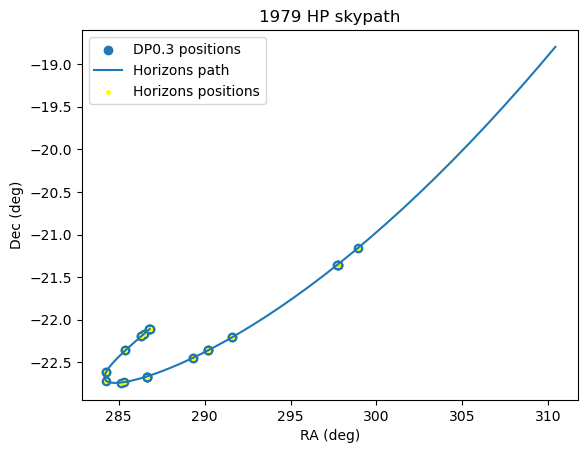

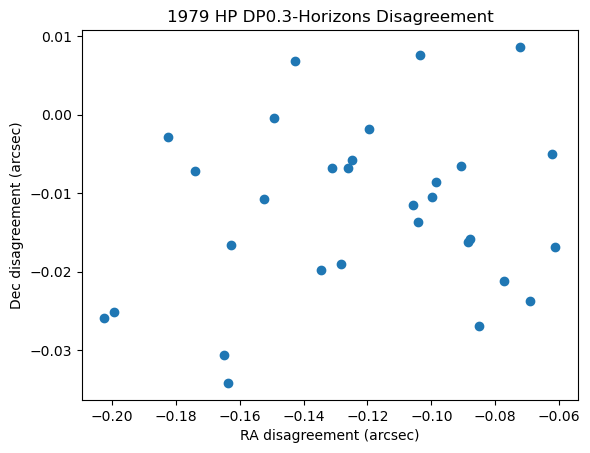

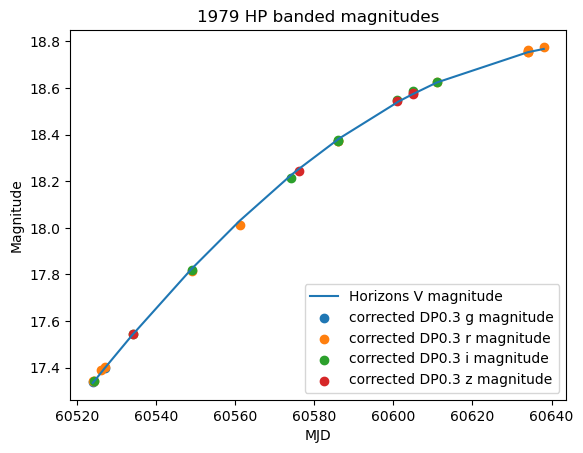

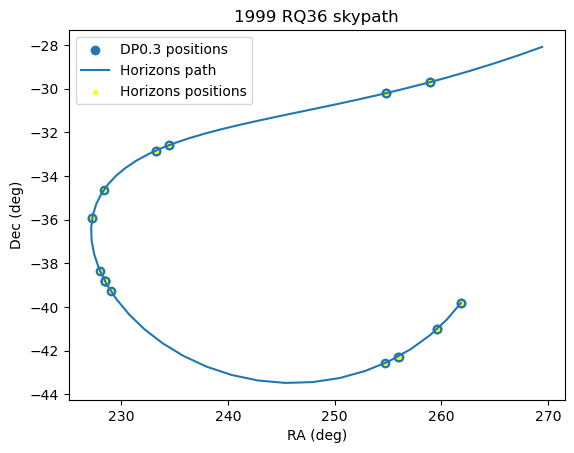

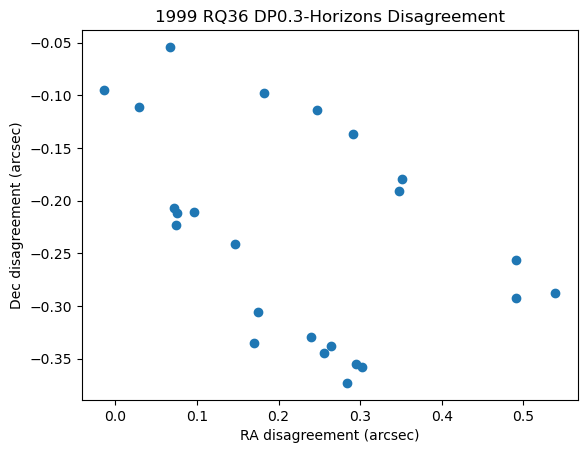

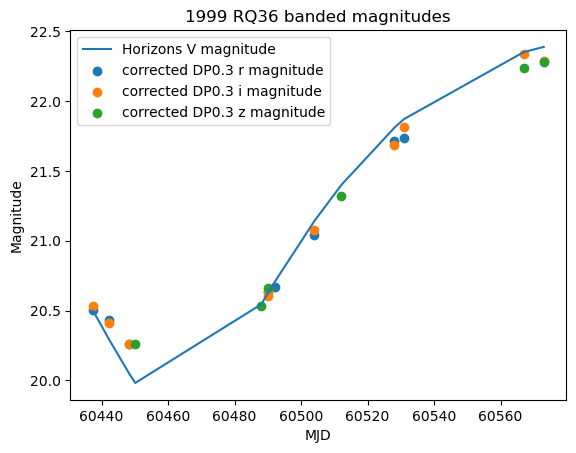

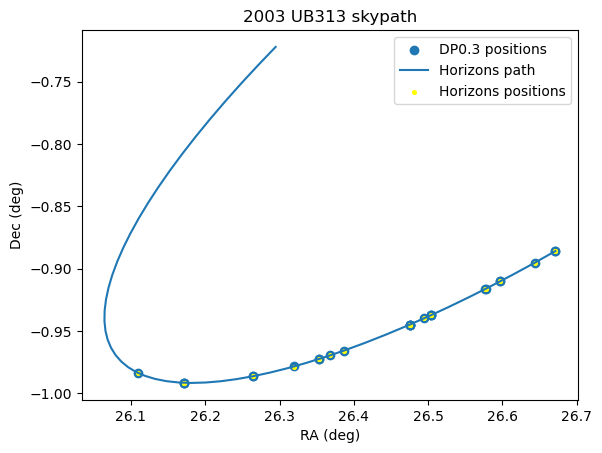

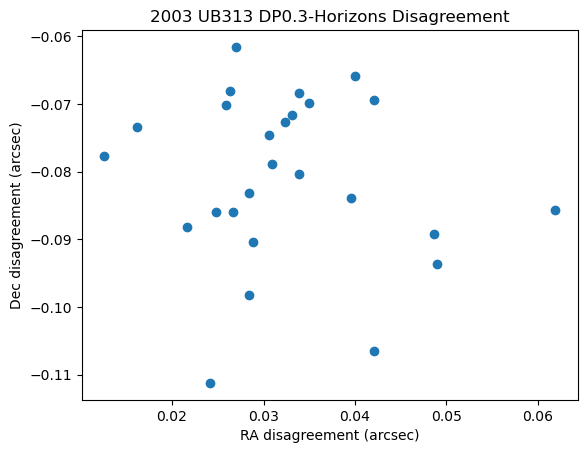

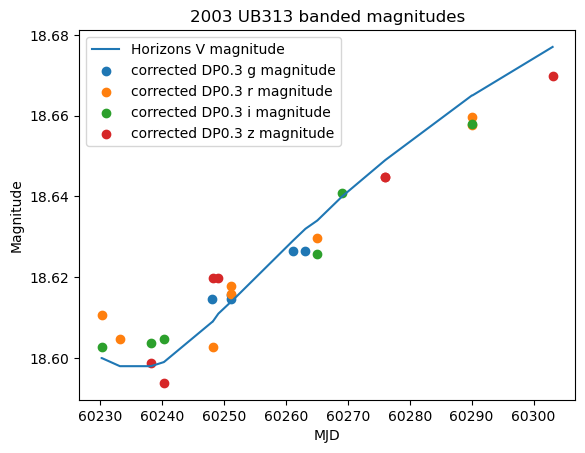

In [22]:


for ObjID, dp03_detections in results_groups:
    
    duration = 150
    t0 = min(dp03_detections['midPointMjdTai'])
    uniform_times = np.linspace(t0, t0+duration, 50)
    
    dp03_detections = dp03_detections[(dp03_detections['midPointMjdTai'] - t0)  < duration]
    dp03_detections = dp03_detections.sort_values('midPointMjdTai')

    dp03_ra, dp03_dec, dp03_mjd = dp03_detections[['ra', 'dec', 'midPointMjdTai']].values.T
    
    Horizons_eph_same_time = Horizons(id=ObjID, location='X05', epochs=dp03_mjd + 2400000.5).ephemerides()
    Horizons_ra_same_time = Horizons_eph_same_time['RA'].data.data
    Horizons_dec_same_time = Horizons_eph_same_time['DEC'].data.data
    Horizons_V_same_time = Horizons_eph_same_time['V'].data.data

    
    Horizons_eph_uniform_time = Horizons(id=ObjID, location='X05', epochs=uniform_times).ephemerides()
    Horizons_ra_uniform_time = Horizons_eph_uniform_time['RA'].data.data
    Horizons_dec_uniform_time = Horizons_eph_uniform_time['DEC'].data.data

    scatter_and_plot_skypath(dp03_ra, dp03_dec, Horizons_ra_same_time, Horizons_dec_same_time,
            Horizons_ra_uniform_time, Horizons_dec_uniform_time, ObjID)
    
    scatter_differences(dp03_ra, dp03_dec, Horizons_ra_same_time, Horizons_dec_same_time,
            dp03_detections['midPointMjdTai'], ObjID)

    scatter_bands_V(dp03_mjd, Horizons_V_same_time, dp03_detections, ObjID)
    print('\n' * 20)